In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# IPL Data Analysis in Python

In this tutorial, We will see how to get started with Data Analysis in Python. The **Python packages** that we use in this notebook are:

* `numpy`
* `pandas`
* `matplotlib`
* `seaborn`

The **dataset** that we use in this notebook is **IPL (Indian Premier League) Dataset** posted on **Kaggle Datasets**

The following are the data sets used for IPL data analysis

* `Ball_By_Ball.csv`
* `Player.csv`
* `Match.csv`

![IPL](ipl_logo.jpg)

### Questions:

* Left-hand batsman count vs Right-hand batsman
* How many players participated from each country?
* How many bowlers are there belonging to different bowling skills?
* How many run scored per ball in an over in whole ipl?
* visualize different types of wickets_taken in whole ipl?
* How many matches we've got in the dataset?
* How many seasons we've got in the dataset?
* Which Team had won by maximum runs?
* Which Season had most number of matches?
* Which IPL Team is more successful? 
* Has Toss-winning helped in winning matches?

### Loading required Python packages

In [2]:
import csv
import matplotlib.pyplot as mp
import pandas as pd
import numpy as np
import seaborn as sns

### The function used for plotting bar graphs in general

In [3]:
def bar_graph(xvals,yvals,name=None,yn=None,type=None):
    if type==None:
        mp.bar(xvals,yvals)
    else:
        mp.barh(xvals,yvals)
    mp.grid(True)
    if name!=None:
        mp.title(name)
    mp.show()
    if yn!=None:
        mp.axis(ymin=yn)

### The function used to get dictionay data type from a list grouping each category with its count

In [4]:
def get_dic_from_list(data):
    x=list(set(data)) #contains categories of data
    y=[] #contains count of each categories
    for a in x:
        y.append(data.count(a))
    return x,y 

### The fucntion used to compare a list of players based on man of matches they have won

In [5]:
def compare_players(play_list):
    top_players = matches.ManOfMach.value_counts()
    sns.barplot(x=x,y=[top_players[a] for a in x])

In [6]:
players_data=open("Player.csv",encoding='latin1') #players csv file and encoding is used because file doesn't belong to unicode

In [7]:
#bats_data=csv.reader(bat_data)
players_frame=pd.read_csv(players_data)#creating data frame from csv file

In [8]:
#code to vialize count of left hand batsman vs right hand batsman
hands_data=list(players_frame["Batting_hand"])
lh=hands_data.count("Left-hand bat")
rh=hands_data.count("Right-hand bat")

### Left-hand batsman count vs Right-hand batsman

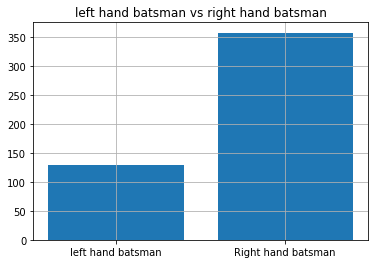

In [9]:
bar_graph(["left hand batsman","Right hand batsman"],[lh,rh],name="left hand batsman vs right hand batsman") #bar graph which shows count of lb vs rbs

In [10]:
#code to vialize count of players from different countries
countries_list=list(players_frame["Country_Name"])
countries_set=list(set(countries_list))


In [11]:
county=[]#to store count of batsman wrt countries
for x in countries_set:
    county.append(countries_list.count(x))
countries_count={x:y for x,y in zip(countries_set,county)}
#print(countries_count)

### How many players participated from each country?

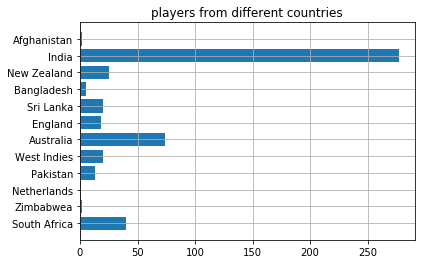

In [12]:
#bar_graph(countries_count.keys(),countries_count.values(),name="players from different countries")
xvals,yvals=get_dic_from_list(countries_list)
bar_graph(xvals,yvals,name="players from different countries",type="h")

### How many bowlers are there belonging to different bowling skills?

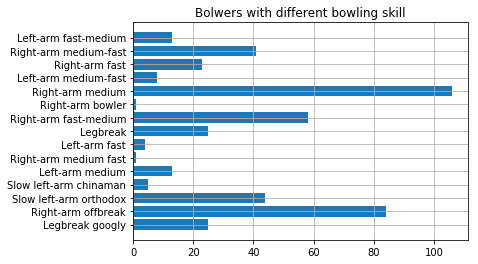

In [13]:
bowl_data=players_frame["Bowling_skill"]
bowl_list=[]
for x in bowl_data:
    if str(x)!='nan':
        x=x.replace('\xa0', '')
        bowl_list.append(x)
bowl_set=list(set(bowl_list))
xvals,yvals=get_dic_from_list(bowl_list)
bar_graph(xvals,yvals,name="Bolwers with different bowling skill",type="h")

In [14]:
#data reading from new ball_by_ball.csv
balls_data=open("Ball_By_Ball.csv")

In [15]:
bd_frame=pd.read_csv(balls_data)#data frame containing ball-ball data

In [16]:
#print(set(bd_frame["Ball_id"]))

In [17]:
#print(len(bd_frame))

In [18]:
ball_count=[1,2,3,4,5,6]

In [19]:
ball_runs=[0,0,0,0,0,0]
ball_ids=list(bd_frame["Ball_id"])

In [20]:
runs=list(bd_frame["Runs_Scored"])

In [21]:
for i,x in enumerate(runs):
    if ball_ids[i]<=6:
        ball_runs[ball_ids[i]-1]+=x
    #else:
        #ball_runs[5]+=x
#print(ball_runs)

### How many run scored per ball in an over in whole ipl?

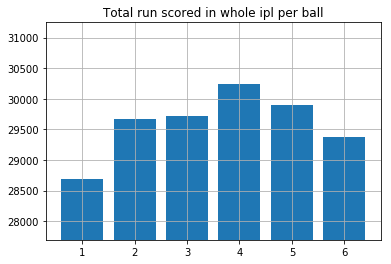

In [22]:
#bar_graph(ball_count,ball_runs,name="Total run scored in whole ipl per ball",ymin=min(ball_runs)-1000)
#bar graph to visualize total run scored in whole ipl per ball
mp.bar(ball_count,ball_runs)
mp.title("Total run scored in whole ipl per ball")
mp.ylim(min(ball_runs)-1000,max(ball_runs)+1000)
mp.grid(True)
mp.show()

In [23]:
#bar plot to vialize different types of wickets
wicket_type=["Caught","Bowled","Run_out","LBW","Stumped","hit_wicket"]

In [24]:
wicket_count={}
for x in wicket_type:
    wicket_count[x]=sum(list(bd_frame[x]))

In [25]:
print(wicket_count)

{'Stumped': 243, 'hit_wicket': 9, 'Run_out': 755, 'Caught': 4373, 'LBW': 455, 'Bowled': 1382}


### visualize different types of wickets_taken in whole ipl?

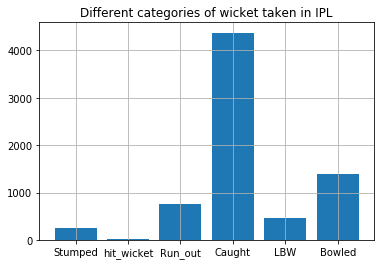

In [26]:
bar_graph(wicket_count.keys(),wicket_count.values(),name="Different categories of wicket taken in IPL")

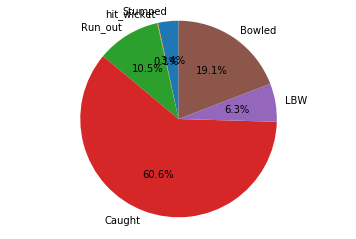

In [27]:
#code to visualize the wickets taken type using pie chart
fig1, ax1 = mp.subplots()
ax1.pie(wicket_count.values(),labels=wicket_count.keys(), autopct='%1.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
mp.show()

In [28]:
#using seaborn to vialize the ipl data
sns.set_style("darkgrid")
mp.rcParams['figure.figsize']=(14,8)
matches_data=open("Match.csv")
matches=pd.read_csv(matches_data)


### How many matches we've got in the dataset?

In [29]:
print(matches.shape)#to display the total number of rows and columns

(637, 17)


In [30]:
print(matches.info())#to display the schema of the data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 636
Data columns (total 17 columns):
Match_SK        637 non-null int64
match_id        637 non-null int64
Team1           637 non-null object
Team2           637 non-null object
match_date      637 non-null object
Season_Year     637 non-null int64
Venue_Name      636 non-null object
City_Name       637 non-null object
Country_Name    637 non-null object
Toss_Winner     636 non-null object
match_winner    634 non-null object
Toss_Name       636 non-null object
Win_Type        635 non-null object
Outcome_Type    637 non-null object
ManOfMach       633 non-null object
Win_Margin      628 non-null float64
Country_id      637 non-null int64
dtypes: float64(1), int64(4), object(12)
memory usage: 89.6+ KB
None


In [31]:
print(matches.describe())

         Match_SK        match_id  Season_Year  Win_Margin  Country_id
count  637.000000      637.000000   637.000000  628.000000  637.000000
mean   318.000000   637882.544741  2012.497645   17.272293    1.152276
std    184.030342   235631.247375     2.776600   22.212632    0.438388
min      0.000000   335987.000000  2008.000000    0.000000    1.000000
25%    159.000000   419155.000000  2010.000000    6.000000    1.000000
50%    318.000000   548383.000000  2012.000000    8.000000    1.000000
75%    477.000000   829748.000000  2015.000000   20.000000    1.000000
max    636.000000  1082650.000000  2017.000000  146.000000    3.000000


In [32]:
matches.head(5)

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5,1


In [33]:
print("Total matches played in IPL:",len(matches))

Total matches played in IPL: 637


### Which Team had won by maximum runs?

In [34]:
print("seasons:",matches['Season_Year'].unique())

seasons: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


### Which Team had won by maximum runs?

In [35]:
print(matches.iloc[matches['Win_Margin'].idxmax()])

Match_SK                     621
match_id                 1082635
Team1           Delhi Daredevils
Team2             Mumbai Indians
match_date              5/6/2017
Season_Year                 2017
Venue_Name      Feroz Shah Kotla
City_Name                  Delhi
Country_Name               India
Toss_Winner     Delhi Daredevils
match_winner      Mumbai Indians
Toss_Name                  Field
Win_Type                    runs
Outcome_Type              Result
ManOfMach            LMP Simmons
Win_Margin                   146
Country_id                     1
Name: 621, dtype: object


### Which season had most number of matches?

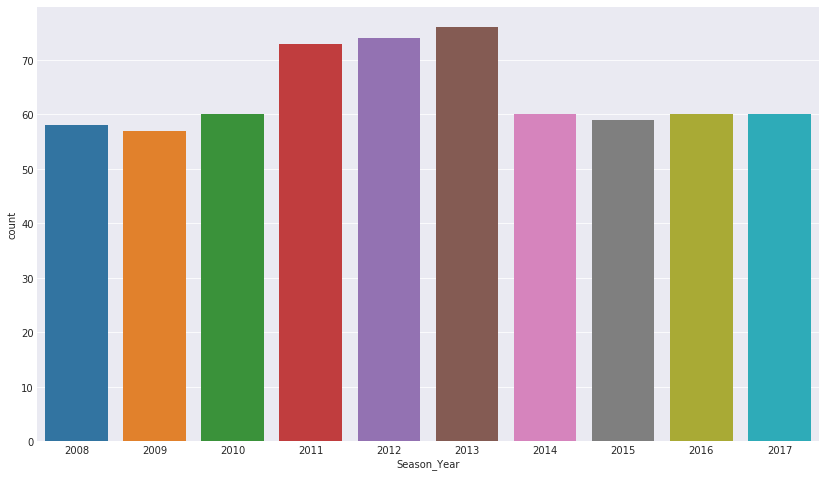

In [36]:
#vializing the no.of matches played per season
sns.countplot(x='Season_Year',data=matches)
mp.show()

### The most successful IPL Team

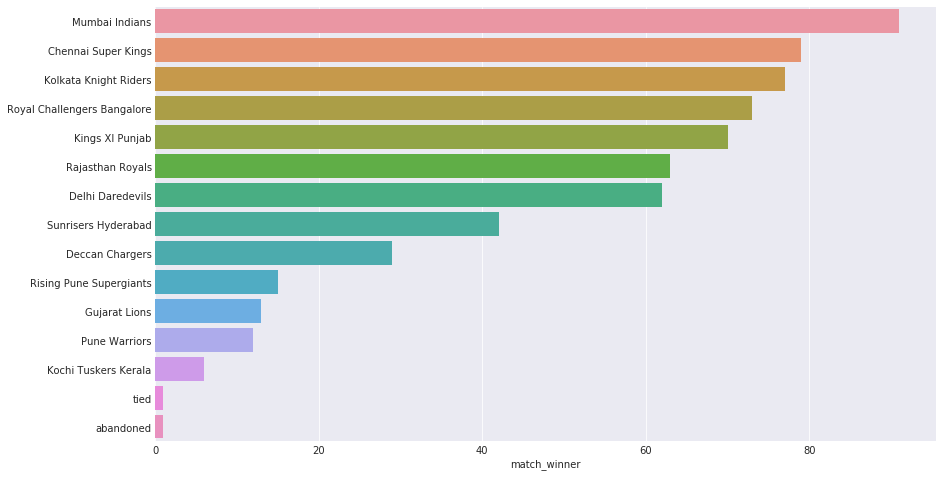

In [37]:
#visualizing most number of matches won by team
data = matches.match_winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

### Has Toss-winning helped in Match-winning?

In [38]:
#visualizing how winning toss helped winning match
ss = matches['Toss_Winner'] == matches['match_winner']
ss.groupby(ss).size()

False    313
True     324
dtype: int64

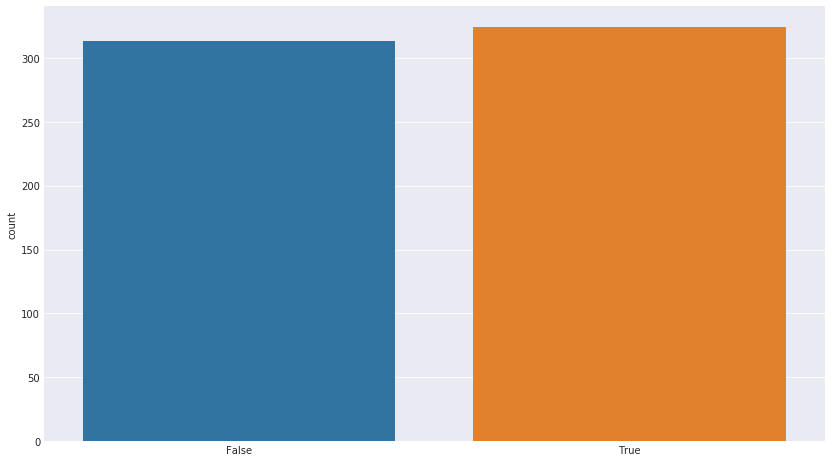

In [39]:
sns.countplot(ss)

### Top player of the match Winners

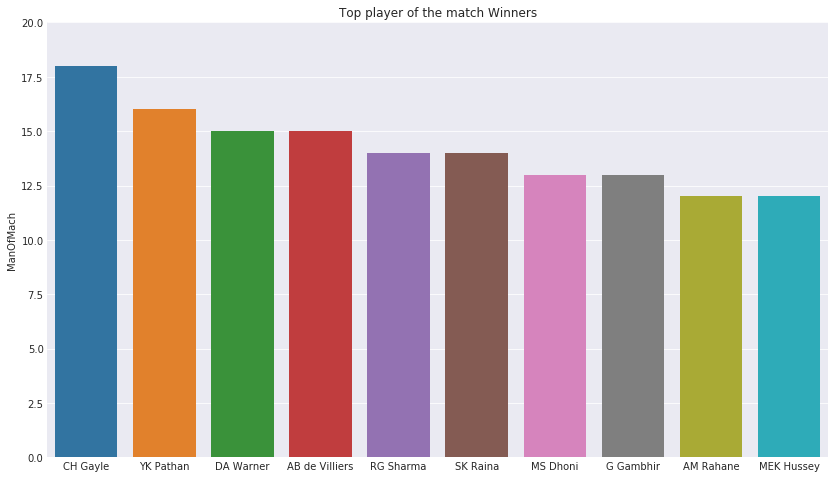

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: ManOfMach, dtype: int64


In [40]:
#visualizing top players of match winners
top_players = matches.ManOfMach.value_counts()[:10]
fig, ax = mp.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
mp.show()
print(top_players)

### comparision of players based on the man of matches they have won

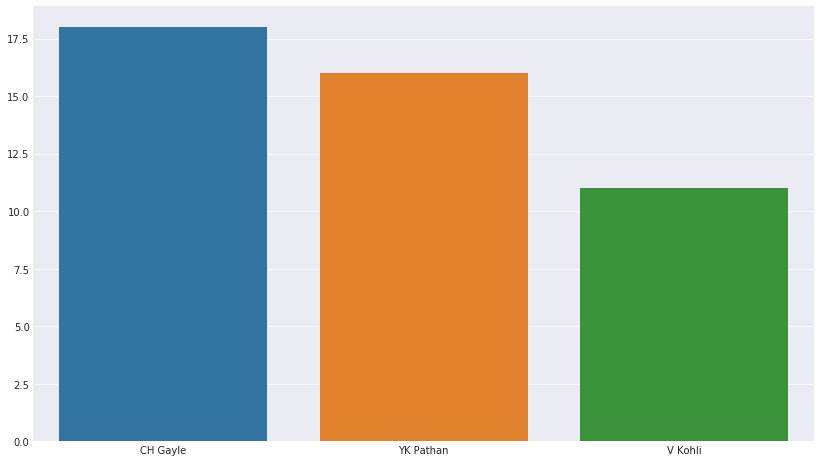

In [41]:
x=['CH Gayle','YK Pathan','V Kohli']
compare_players(x)